# <img src="https://img.icons8.com/dusk/64/000000/artificial-intelligence.png" style="height:50px;display:inline"> EE 046202 - Technion - Unsupervised Learning & Data Analysis

* Formerly 046193 

#### Tal Daniel

## Tutorial 02 - Classical Methods in Statistical Inference - Confidence Intervals

### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Agenda

* Interval Estimation (Confidence Intervals)
    * Formulation
    * Finding Interval Estimators
* Bootstrap Approach
    * Boostrap for the Median Estimator
*  Confidence Interval with DKW Inequality


In [1]:
# imports for the tutorial
import numpy as np
import pandas as pd
from helpers.cdf_bounds import plot_cdf_confidence
from scipy.stats import norm
import time
import matplotlib.pyplot as plt
%matplotlib notebook

### <img src="https://img.icons8.com/doodle/96/000000/defensive-wood-wall--v2.png" style="height:50px;display:inline"> Confidence Intervals (Interval Estimation)

* What is the problem with **point estimation** for $\theta$, $\hat{\theta}$?
    * $\hat{\theta}$ alone does not give much information about $\theta$!
    * Without any additional information, we cannot tell how close is $\hat{\theta}$ to the real $\theta$.

* **Interval Estimation** - an interval that is *likely* to include the true value of $\theta$.
    * Instead of saying $\hat{\theta} = 8.14$, we report: $ [\hat{\theta}_l, \hat{\theta}_h ] = [6.65, 9.87 ] $, which we hope includes the real value of $\theta$.
    * We actually produce 2 estimates for $\theta$: *high* estimate $\hat{\theta}_h$ and *low* estimate $\hat{\theta}_l$.
    * We define two important properties of a confidence interval:
        * **Length** - the precision which we can estimate $\theta$. Defined as $\hat{\theta}_h - \hat{\theta}_l$
        * **Confidence Level** - how confident are we in the interval. It is the *probability* that the real $\theta$ lies in the interval. We wish to have high confidence (usually 90-95%).
        * <img src='./assets/tut_01_conf_int_1.jpg' style="height:300px"> Image from <a href="https://www.quora.com/Why-is-a-99-confidence-level-wider-when-constructing-confidence-intervals">Quora.com</a>

#### <img src="https://img.icons8.com/nolan/64/000000/sigma.png" style="height:30px;display:inline"> Formulation
Let $X_1, X_2, .., X_n$ be a random sample from a distribution with a parameter $\theta$ that is to be estimated.

**The goal** is to find *two* estimators for $\theta$:
1. The low estimator: $$\hat{\theta}_l = \hat{\theta}_l(X_1, X_2,..., X_n)$$
2. The high estimator: $$\hat{\theta}_h = \hat{\theta}_h(X_1, X_2,..., X_n)$$

* The interval estimator is:  $ [\hat{\theta}_l, \hat{\theta}_h ]$.
* **Confidence Level** - defined to be $1-\alpha$.
* The estimators  $ \hat{\theta}_l, \hat{\theta}_h $ are chosen such that the **probability** that the interval  $ [\hat{\theta}_l, \hat{\theta}_h ]$ includes $\theta$ is larger than the confidence level $1-\alpha$. Thus, we wish $\alpha$ to be **small**.
    * Common values for $\alpha$ are: $0.1, 0.05, 0.01$ which correspond to confidence levels 90%, 95% and 99% respectively.
* Formally: find  $\hat{\theta}_l, \hat{\theta}_h$ such that $$ P(\hat{\theta}_l \leq \theta \leq \hat{\theta}_h) \geq 1- \alpha $$ or $$ P(\theta \in [\hat{\theta}_l, \hat{\theta}_h ]) \geq 1-\alpha $$

#### <img src="https://img.icons8.com/dusk/64/000000/find-and-replace.png" style="height:30px;display:inline"> Finding Interval Estimators
* Recall that for a continuous random variable $X$ with **CDF** (Cumulative Distribution Function) $F_X(x) = P(X \leq x)$ that we want to find probability between bounds such that: $$ P(x_l \leq X \leq x_h) = 1 - \alpha $$ We can choose (notice the different inequality signs): $$ P(X \leq x_l) = \frac{\alpha}{2} \text{, and } P(X \geq x_h) = \frac{\alpha}{2} $$ Or, eqivalently $$ F_X(x_l) = \frac{\alpha}{2} \text{, and }  F_X(x_h) = 1 -  \frac{\alpha}{2}$$ <br> $$ \rightarrow x_l = F_X^{-1}(\frac{\alpha}{2}),  x_h = F_X^{-1}(1 - \frac{\alpha}{2})$$

We call the interval $[x_l, x_h]$ a $(1-\alpha)$ interval for $ X$
   * Note: why do we divide $\alpha$ by 2 and not by 4 (and then pick $\frac{\alpha}{4}, \frac{3\alpha}{4}$ instead of $\frac{\alpha}{2}$)?
        * Since we are calculating *both* upper and lower bounds. Had we been interested in a single sided interval, then we would not have needed this division. Moreover, we would like our confidence level to be symmetrical in relation to both upper and lower bounds, there is no reason to give more weight to one over the other.
<img src="./assets/tut_01_conf_int_2.png" style="height:250px"> Image from <a href="https://www.probabilitycourse.com/chapter8/8_3_2_finding_interval_estimators.php">probabilitycourse.com</a>

#### <img src="https://img.icons8.com/dusk/64/000000/task.png" style="height:30px;display:inline"> Exercise - Confidence Intervals for Normal Distribution (Using CLT)
1. (Probability Exercise) Let $Z \sim \mathcal{N}(0,1)$. Find $x_l, x_h$ such that $$ P(x_l \leq Z \leq x_h) = 0.95 $$
    * <a href="https://www.math.arizona.edu/~jwatkins/normal-table.pdf"> Normal Table </a>
2. Let $X_1, X_2, ..., X_n$ be a random sample from a normal distribution $\mathcal{N}(\theta, 1)$. Find a 95% confidence interval for $\theta$.

#### <img src="https://img.icons8.com/dusk/64/000000/idea.png" style="height:30px;display:inline"> Solution
*Section 1*

$\alpha = 0.05$, and $\phi$ denotes the CDF of $Z$. Thus, we can choose: $$ x_l = \phi^{-1}(\frac{\alpha}{2}) = \phi^{-1}(0.025) = -1.96 $$ $$ x_h = \phi^{-1}(1 - \frac{\alpha}{2}) = \phi^{-1}(1 - 0.025) = 1.96 $$ More generally, if we assume $Z \sim \mathcal{N}(0,1)$, for any $p \in [0,1]$, we define $z_p$ as the real value for which $P(Z>z_p) = p$. Therfore, $\phi(z_p) = 1-p \rightarrow z_p = \phi^{-1}(1-p)$. In our case $$ P(-z_{\frac{\alpha}{2}} \leq Z \leq z_{\frac{\alpha}{2}}) = 1-\alpha $$ <img src="./assets/tut_01_conf_int_3.png" style="height:250px"> Image from <a href="https://www.probabilitycourse.com/chapter8/8_3_2_finding_interval_estimators.php">probabilitycourse.com</a>

*Section 2*

We begin with finding the **point estimator** for $\theta$, which is the *mean* of the distribution. Recall from previous exercise that: $\hat{\theta} = \overline{X} = \frac{X_1 + X_2 + ... +X_n}{n}$ and since $X_i \sim \mathcal{N}(\theta,1)$ and the samples are i.i.d. then: $\overline{X} \sim \mathcal{N}(\theta, \frac{1}{n})$. We now perform **standartization** (normalization in our case): $$ \frac{\overline{X} - \theta}{\frac{1}{\sqrt{n}}} = \sqrt{n}(\overline{X} - \theta) \sim \mathcal{N}(0,1) $$ Thus: $$ P\big( -1.96 \leq  \sqrt{n}(\overline{X} - \theta) \leq 1.96 \big) = 0.95 $$ $$ \rightarrow P\big(\overline{X} -\frac{1.96}{\sqrt{n}} \leq  \theta \leq \overline{X} + \frac{1.96}{\sqrt{n}} \big) = 0.95 $$ Therefore, the confidence interval is: $$ [\hat{\theta}_l, \hat{\theta}_h] = [\overline{X} -\frac{1.96}{\sqrt{n}}, \overline{X} + \frac{1.96}{\sqrt{n}}] $$

### <img src="https://img.icons8.com/color/96/000000/rocket-boot.png" style="height:50px;display:inline"> Bootstrap
Bootstrap is a **sampling** method which we use to do estimations (and even train ML algorithms, as in Boosting/Bagging method). The boostrap approach relies on the assumption that drawing random samples **with replacement** from the data, simulates well the actual distribution of the data. In that case, several **statistics** (e.g. the variance) can be calculated using random samples from the data.

* **Motivation** - in general, we cannot compute the confidence interval. Thus, we need a numerical scheme to estimate it. This is where bootstrapping helps us.
* In sampling **with replacement**, each sample unit of the population can occur one or more times in the sample.
    * In statistics, resampling with replacement is called *bootstrapping*.

* **Bootstrap Algorithm**:
    * Denote the original sample: $ L_N = (x_1, x_2, ..., x_N) $
    * Repeat $M$ times:
        * Generate a sample $L_k$ of size $k$ from $L_N$ by sampling *with replacement* (samples can contain multiple copies of the same point).
        * Compute $h$ from $L_k$ (that is, calculate an estimation $h$ using $L_k$).
    * Denote the bootstrap values $H=(h^1, h^2, ..., h^M)$
        * Use these values for calculating all the quantities of interest.

#### <img src="https://img.icons8.com/dusk/64/000000/task.png" style="height:30px;display:inline"> Exercise - Boostrap for the Median Estimator
Given $n$ i.i.d. samples, $\{X_i\}_{i=1}^n$, from $\mathcal{D}$ consider the median estimator denoted by $\hat{\mu}_M$ and calculate the **standard deviation** using the bootstrap approach. Write down the boostrap algorithm for that case.

#### <img src="https://img.icons8.com/dusk/64/000000/idea.png" style="height:30px;display:inline"> Solution
The algorithm:
* Denote the original sample: $ \mathcal{D} = X_n = (x_1, x_2, ..., x_n) $
* Calculate the median estimator $T$: $T \leftarrow median(\mathcal{D})$
* Repeat $M$ times:
    * Generate a sample $L_k$ of size $k$ from $L_N$ by sampling *with replacement*.
    * Compute $T_{boot}^k$ from $L_k$ (that is, calculate an estimation for the median $T_{boot}$ using $L_k$).
        * $T_{boot}^k = median(L_k)$
* Denote the bootstrap values $\hat{T}=(T_{boot}^1, T_{boot}^2, ..., T_{boot}^M)$
    * $Median \leftarrow T$
    * $\hat{\sigma}^2 \leftarrow Variance(\hat{T})$

In [2]:
# let's see the magic
def std_bootstrap(x, k, m, estimator=np.mean):
    estimate_value = estimator(x)
    estimations = []
    for _ in range(m):
        # sample K with replacement
        x_k = np.random.choice(x, size=k, replace=True)
        t_k = estimator(x_k)
        estimations.append(t_k)
    return estimate_value, np.std(estimations)

# generate real data
n = 300  # number of totals samples
K = 100  # number of bootstrap samples
mu , sigma = 1, 4
x = np.random.normal(mu, sigma, size=n)

M = np.arange(1, 101)  # number of boostrap iterations

stds = []
for m in M:
    stds.append(std_bootstrap(x=x, k=K, m=m, estimator=np.median)[1]) 
    # [1] because we don't care about the estiamte, just the std

Text(0.5, 1.0, 'Bootstrap STD of the median estimator as a function of M')

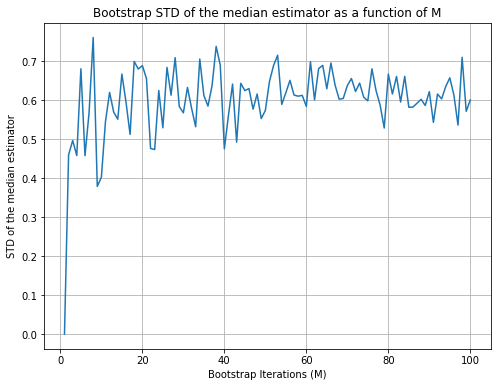

In [6]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1,1,1)
ax.plot(M, stds)
ax.grid()
ax.set_xlabel("Bootstrap Iterations (M)")
ax.set_ylabel("STD of the median estimator")
ax.set_title("Bootstrap STD of the median estimator as a function of M")

### <img src="https://img.icons8.com/ultraviolet/80/000000/less-than-2.png" style="height:50px;display:inline"> Confidence Interval with Chebyshev Inequality
* Recall the **Chebyshev Inequality**: if $X$ is a random variable with finite mean and variance $\sigma^2$, then $$ P(|X-\mathbb{E}[X]|\geq \epsilon)\leq \frac{\sigma^2}{\epsilon^2} $$ for all $\epsilon > 0$.
    * Also, letting $\epsilon = k\sigma$: $$ P(|X-\mathbb{E}[X]|\geq k\sigma)\leq \frac{1}{k^2} $$
        * This is useful when we want to measure the distance in "standard deviations" (e.g., a confidence interval of 2 standard deviations).
* Chebyshev inequality allows us to calculate CIs given the variance (which can be estimated, for instance, with bootstrapping) of a random variable.

* For sample mean $\overline{X}=\frac{1}{N}\sum_{k=1}^NX_K$, Chebyshev inequality tells us: $$ P(|\overline{X} -\mu| \geq \epsilon) \leq \frac{\hat{\sigma}^2}{\epsilon^2} = \frac{\sigma^2}{N\epsilon^2} $$
    * Recall that $\hat{\sigma}$ is the normalized empirical variance for a sample of size $N$.
    * For example, for a 95% CI, $\frac{\sigma^2}{N\epsilon^2} = \alpha= 0.05 \rightarrow \epsilon = \frac{\sigma}{\sqrt{0.05N}}$, which leads to: $$ \overline{X} - \frac{\sigma}{\sqrt{0.05N}} \leq \mu  \leq \overline{X} + \frac{\sigma}{\sqrt{0.05N}} $$ with probability at least 0.95.


### <img src="https://img.icons8.com/officel/80/000000/less-than-2.png" style="height:50px;display:inline"> Confidence Interval with DKW Inequality
The **Dvoretzky–Kiefer–Wolfowitz** (DKW) inequality bounds how close an empirically determined distribution function will be to the distribution function from which the empirical samples are drawn.

Let $X_1, X_2, …, X_n$ be real-valued independent and identically distributed (i.i.d.) random variables with cumulative distribution function (CDF) $F(\cdot)$ (that is, they are sampled from $F$, $X_1, X_2, …, X_n \sim F$). Let $F_n$ denote the associated **empirical distribution** function defined by: $$ F_n(x) = \frac{1}{n}\sum_{i=1}^n \mathbb{1}_{\{X_i \leq x\}}, x \in \mathbb{R} $$

* $F(x)$ - the probability that a *single* random variable $X$ is smaller than $x$
* $F_n(x)$ - the *fraction* of random variables that are smaller than $x$

The DKW inequality bounds the probability that the random function $F_n$ differs from $F$ by more than a given constant $\epsilon > 0$ anywhere on the real line ($\mathbb{R}$): $$ Pr\big( \underset{x \in \mathbb{R}}{sup} |F_n(x) - F(x)| > \epsilon \big) \leq 2e^{-2n\epsilon^2}, \forall \epsilon >0 $$

* This strengthens the **Glivenko–Cantelli** theorem by quantifying the *rate of convergence* as $n$ tends to infinity.
    * But it holds for any $n$

#### Producing CDF-based Confidence Bounds

* The DKW inequality is one method for generating CDF-based confidence bounds and producing a confidence band. 
* The purpose of this confidence interval is to contain the entire CDF at the specified **confidence level** 
    * Alternative approaches attempt to only achieve the confidence level on each *individual point* which can allow for a tighter bound. 
* The DKW bounds runs parallel to, and is equally above and below, the empirical CDF.

The interval that contains the **true CDF** $F(x)$, with probability $1-\alpha$: $$ F_n(x) - \epsilon \leq F(x) \leq  F_n(x) +\epsilon$$ $$ \alpha = 2e^{-2n\epsilon^2} \rightarrow \epsilon = \sqrt{\frac{ln \frac{2}{\alpha}}{2n}} $$

* What is so special about the DKW condifence bounds?
    * It is **distribution free** - therefore, it is very loose in comparison to the bootstrap estimates, which are usually tighter.
    * **Faster** to calcualte.

In [4]:
def compare_cdf_bounds():
    # generate random data
    x = np.random.randn(300)
    # plot
    fig = plt.figure(figsize=(12,5))
    ax1 = fig.add_subplot(1,2,1)
    ax1.grid()
    s_time = time.time()
    # Pointwise estimate (for each point!) confidence bounds using Beta distribution
    plot_cdf_confidence(data=x, confidence=0.9, color='violet', label='Empirical CDF (90% confidence)', ax=ax1)
    beta_time = time.time() - s_time
    x_sorted = np.sort(x)
    ax1.plot(x_sorted, norm.cdf(x_sorted), ':', label='True CDF')
    ax1.legend()

    ax2 = fig.add_subplot(1,2,2)
    ax2.grid()
    s_time = time.time()
    # DKW (not pointwise!) confidence bounds
    plot_cdf_confidence(data=x, confidence=0.9, color='violet', label='Empirical CDF (90% confidence)-DKW',
                        estimator_name='DKW', ax=ax2)
    dkw_time = time.time() - s_time
    x_sorted = np.sort(x)
    ax2.plot(x_sorted, norm.cdf(x_sorted), ':', label='True CDF')
    ax2.legend()
    print("pointwise: {:.3} sec, DKW: {:.3} sec".format(beta_time, dkw_time))

pointwise: 0.0928 sec, DKW: 0.00499 sec


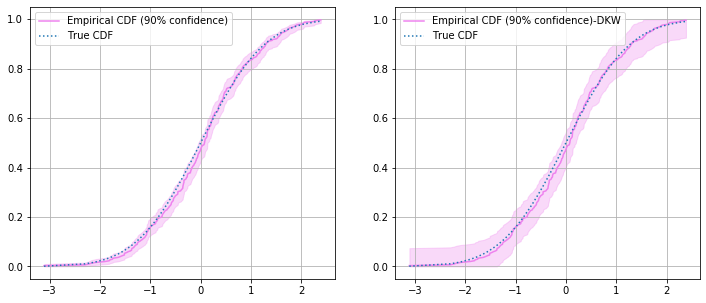

In [5]:
compare_cdf_bounds()

#### <img src="https://img.icons8.com/dusk/64/000000/task.png" style="height:30px;display:inline"> Exercise - Confidence Intervals Calculation
* Reminder: **Hoeffding Inequality**: Let $X_1, ..., X_n$ be i.i.d. random variables, bounded by the intervals $a_i \leq X_i \leq b_i$. Let the empirical mean be defined according to $\overline{X} = \frac{1}{n} \sum_{i=1}^n X_i$. It holds that: $$ P(|\overline{X} - \mathbb{E}[\overline{X}]| \geq \epsilon) \leq 2e^{-\frac{2n^2\epsilon^2}{\sum_{i=1}^n(a_i - b_i)^2}} $$

Derive an expression for a confidence band of 95% using **DKW** (for the CDF) and **Hoeffding** (for the mean of $X$) inequalities.

Assume:
* True CDF: $F(x)$, estimated CDF: $F_n(x)$
* Estimated mean: $\overline{X}$
* Number of samples $n=60$
* Prior knowledge: the range of the random variables is $X \in [0,45]$
    * No specific distribution.

#### <img src="https://img.icons8.com/dusk/64/000000/idea.png" style="height:30px;display:inline"> Solution
*Section 1*

Using DKW: $$ P(\underset{x \in \mathbb{R}}{sup} |F_n(x) - F(x)| > \epsilon) \leq 2e^{-2n\epsilon^2} = 0.05 $$ $$ \rightarrow \epsilon = \sqrt{\frac{-\ln(0.025)}{2*60}} = 0.175 $$ $$\rightarrow F(x) \in [F_n(x) -0.175, F_n(x) +0.175] $$
   * Deriving a CI for the mean: we know that $\mathbb{E}[X] = \int_{0}^{45}(1-F(x))dx$, therefore: $$ \int_{0}^{45}(1-F(x)\pm0.175)dx = \mathbb{E}[X] \pm 7.875 $$
        * Why is $\mathbb{E}[X] = \int(1-F(x))dx$? Recall the Tail Sum formula from previous tutorial ($\mathbb{E}[X] = \sum_{i=1}^n P(X \geq i)$). In the continuous space it is completely analogous! $$ \mathbb{E}[X] = \int_x P(X \geq x) = \int_x 1 - P(X \leq x) = \int_x 1 - F(x) $$
            * <a href="https://en.wikipedia.org/wiki/Expected_value#General_case_2"> Proof </a>

*Section 2*

Using Hoefdding: $$ P(|\overline{X} - \mathbb{E}[\overline{X}]| \geq \epsilon) \leq 2e^{-\frac{2n^2\epsilon^2}{\sum_{i=1}^n(a_i - b_i)^2}} = 2e^{-\frac{2\cdot 60^2\epsilon^2}{\sum_{i=1}^{60}(45 - 0)^2}} = 0.05 $$ $$ \rightarrow \epsilon = 7.89 \rightarrow \mathbb{E}[X] \in [\overline{X} -7.89, \overline{X} +7.89] $$


* We see that both approaches yield similar CI (same range) for the mean. In this sense, the estimators are equivalent.


### <img src="https://img.icons8.com/bubbles/50/000000/video-playlist.png" style="height:50px;display:inline"> Recommended Videos

#### <img src="https://img.icons8.com/cute-clipart/64/000000/warning-shield.png" style="height:30px;display:inline"> Warning!
* These videos do not replace the lectures and tutorials.
* Please use these to get a better understanding of the material, and not as an alternative to the written material.

#### Video By Subject

* Confidence Intervals - <a href="https://www.youtube.com/watch?v=yDEvXB6ApWc&t=600s"> CrashCourse </a>
* Bootstrap - <a href="https://www.youtube.com/watch?v=655X9eZGxls">Confidence Intervals: Intro to bootstrapping proportions </a>


## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
* Examples, exercises and definitions from <a href="https://probabilitycourse.com/">Introduction to Probability, Statistics and Random Processes</a> - https://probabilitycourse.com
* Icons from <a href="https://icons8.com/">Icon8.com</a> - https://icons8.com
* Datasets from <a href="https://www.kaggle.com/">Kaggle</a> - https://www.kaggle.com/